<a href="https://colab.research.google.com/github/casjunior93/Artigo-DIO---Identificando-algarismos-escritos-a-mao-com-Scikit-Learn/blob/main/Classifica%C3%A7%C3%A3o_Identificando_algarismos_escritos_%C3%A0_m%C3%A3o_com_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificando algarismos com Scikit Learn

Primeiramente, vamos desabilitar alguns aviso chatos.

In [1]:
import warnings
warnings.filterwarnings('ignore')

Neste projeto, vamos treinar um classificador para tentar identificar algarismos escritos. Para isso, vamos usar o conjunto de dados MNIST. Ele é composto por 70 mil imagens de algarismos escritos à mão.

O conjunto MNIST pode ser importado utilizando o Scikit-Learn, executando a célula abaixo:

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Conferindo o conjunto:

In [3]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


A chave data contém um array com os dados. Cada linha contém 784 colunas. Como cada imagem tem 28x28 pixels, cada coluna representa a intensidade de um pixel, sendo 0 (branco) e 1 (preto).

A chave target contém um array com os rótulos, que são os algarismos que cada imagem representa.

Para visualizar um algarismo do dataset, precisamos pegar o vetor das características de uma instância e remodelar para uma matriz 28x28.

Vamos escolher uma instância e montar a imagem. Escolhemos a instância com índice 5.

In [4]:
algarismo = X.to_numpy()[5]

Observando o vetor:

In [5]:
algarismo

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Remodelando o vetor para uma matriz 28x28:

In [6]:
algarismo_imagem = algarismo.reshape(28,28)

Agora importamos a biblioteca Matplotlib e usamos a função imshow().

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

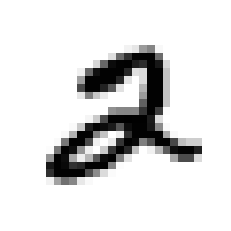

In [8]:
plt.imshow(algarismo_imagem, cmap='binary')
plt.axis('off')
plt.show()

O algarismo parece um 2. Quando vemos o rótulo dessa imagem, vemos que é 2.

In [9]:
y[5]

'2'

Os rótulos são do tipo string. Para utilizarmos o algoritmo de Machine Learning vamos converter os valores de y para inteiros.

In [10]:
y = y.astype('int64')

In [11]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

## Separando os dados em conjuntos de teste e treino

Vamos utilizar as primeiras 60 mil imagens como o conjunto de treino e as últimas 10 mil como conjunto de teste.

In [12]:
X_treino, X_test = X[:60000], X[:10000]

In [13]:
y_treino, y_teste = y[:60000], y[:10000]

## Treinando um classificador binário

Vamos treinar o classificador para tentar identificar um único algarismo. Para isso, vamos considerar duas classes, uma classe que corresponde ao algarismo que queremos identificar e outra que não corresponde. Por exemplo, se queremos identificar o algarismo 2, teremos as classes "2" e "não-2". Vamos continuar criando um classificador para o algarismo 2.

In [14]:
y_treino_2 = (y_treino == 2)
y_teste_2 = (y_teste == 2)

Observamos que os valores de y, tanto para teste, quanto para treino, foram substituídos para False se y diferente de 2 e True se y igual a 2.

In [15]:
y_treino_2

0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [16]:
y_teste_2

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: class, Length: 10000, dtype: bool

Chegou a hora de treinar o classificador! Vamos utilizar o *gradiente descendente estocástico*, chamando a classe **SGDClassifier** do Scikit-Learn. Saiba mais sobre *gradiente descendente* e *gradiente descendente estocástico* nesse artigo: https://medium.com/@gabrielkirsten/a-evolu%C3%A7%C3%A3o-da-descida-de-gradiente-e-seus-otimizadores-680c835c1b4f

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

Uma observação, é necessário definir o parâmetro random_state para a SGDClassifier para manter os resultados reproduzíveis, caso contrário, a aleatoriedade que esse classificador depende pode nos trazer resultados diferentes em cada vez que o treinarmos.

Finalmente vamos treinar o classificador!

In [18]:
sgd_clf.fit(X_treino, y_treino_2)

SGDClassifier(random_state=42)

Feito! Agora vamos fazer um teste utilizando a variável agarismo que criamos anteriormente. Lembre-se que a variável recebeu o algarismo 2.

In [19]:
sgd_clf.predict([algarismo])

array([ True])

Retornou True, ou seja, o classificador estimuou que o algarismo é o 2 corretamente. Agora vamos tentar outro algarismo. O algarismo do índice 0 é o 5.

In [20]:
sgd_clf.predict([X.to_numpy()[0]])

array([False])

Opa! Com o retorno False, nosso classificador estimou que a imagem representada no índice 0 do dataset original não é o algarismo 2.

Em um próximo artigo, vamos falar como avaliar o desempenho desse modelo classificador.

Até a próxima!